<a href="https://colab.research.google.com/github/sungjin-kim-data/ML_PROJECT/blob/master/PROJECT_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
!pip uninstall xgboost

Found existing installation: xgboost 1.6.2
Uninstalling xgboost-1.6.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/xgboost-1.6.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xgboost.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/xgboost/*
Proceed (y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/uninstall.py", line 86, in run
    auto_confirm=options.yes, verbose=self.verbosity > 0,
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_install.py", line 658, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_uninstall.py", line 380, in remove
    if auto_confirm or self._allowed_to_proceed(verbose):
  Fil

In [93]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import xgboost 
xgboost.__version__

'1.6.2'

In [95]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [96]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as shc

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations

In [97]:
df = pd.read_csv('/content/Shipping Data.csv')
df

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5                  216                2   
2                    2                  183                4   
3                    3                  176                4   
4                    2                  184                3   
...                ...                  ...              ...   
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
0                    low      F                44           1233   
1                    low      M                59           3088   
2                    low      M                48           3374   
3                 medium      M                10           1177   
4                 medium      F                46           2484   
...                  ...    ...               ...            ...   
10994             medium      F                 1           1538   
10995             medium      F                 6           1247   
10996                low      F                 4           1155   
10997             medium      M                 2           1210   
10998                low      F                 6           1639   

       Reached.on.Time_Y.N  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
10994                    1  
10995                    0  
10996                    0  
10997                    0  
10998                    0  

[10999 rows x 12 columns]

**ID**: ID Number of Customers.  
**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.  
**Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.  
Customer care calls: The number of calls made from enquiry for enquiry of the shipment.  
**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).  
**Cost of the product**: Cost of the Product in US Dollars.  
**Prior purchases**: The Number of Prior Purchase.  
**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.  
**Gender**: Male and Female.  
**Discount offered**: Discount offered on that specific product.  
**Weight in gms**: It is the weight in grams.  
**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [98]:
df.shape

(10999, 12)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [100]:
# id drop

df.drop('ID', axis = 1, inplace = True)
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [101]:
df.describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

In [102]:
df.describe(include=np.object)

Warehouse_block Mode_of_Shipment Product_importance Gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

In [103]:
# 음수 값 확인
print(min(df['Cost_of_the_Product']), max(df['Cost_of_the_Product']))
print(min(df['Weight_in_gms']), max(df['Weight_in_gms']))

96 310
1001 7846


In [104]:
# 데이터 내용 정리해서 출력하기
print("총 데이터 수: ", df.shape[0]*df.shape[1])
print("총 결측치 수: {} / 전체데이터의 {:.2f}% ".format(df.isnull().sum().sum(), (df.isnull().sum().sum()*100)/(df.shape[0]*df.shape[1])))
print("총 중복 수: ", len(df[df.duplicated()]))

총 데이터 수:  120989
총 결측치 수: 0 / 전체데이터의 0.00% 
총 중복 수:  0


In [105]:
# 현 데이터는 다행이 결측치 및 중복이 없다.

In [106]:
# lower 적용
df.columns = df.columns.str.lower()
df.columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n'],
      dtype='object')

In [107]:
# reached.on.time_y.n '.' 을 '_'으로 변경
df = df.rename(columns = {"reached.on.time_y.n" : "reached_on_time_y_n"})
df.columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached_on_time_y_n'],
      dtype='object')

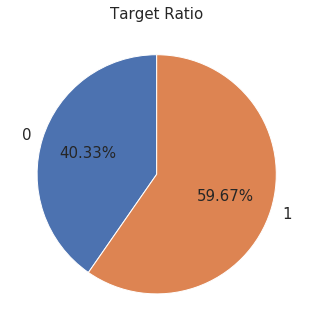

In [108]:
df["reached_on_time_y_n"].value_counts(normalize=True)
zero = (df['reached_on_time_y_n'] == 0).sum()
one = (df['reached_on_time_y_n'] == 1).sum()

plt.pie((zero, one),labels=(0, 1),autopct="%.2f%%",startangle=90, textprops={'fontsize': 15})
plt.title('Target Ratio', fontsize=15)
plt.show()

In [109]:
df.columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached_on_time_y_n'],
      dtype='object')

In [110]:
# warehouse_block counts
x_block = df['warehouse_block'].value_counts().index
y_block = df['warehouse_block'].value_counts().values
colors = sns.color_palette('hls', len(x_block))

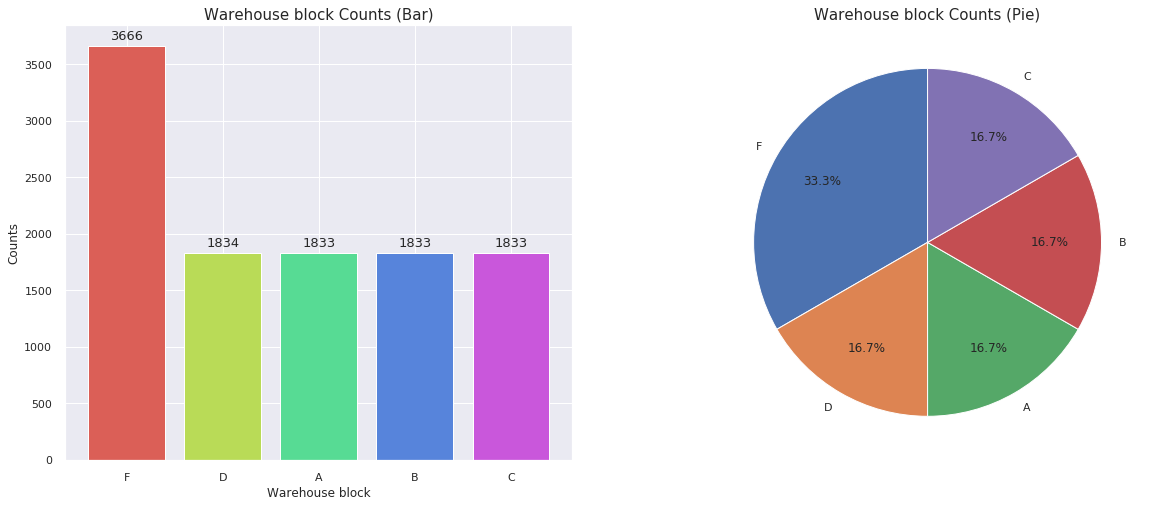

In [111]:
plt.figure(figsize=(20, 8))
axs1 = plt.subplot(1, 2, 1)
axs2 = plt.subplot(1, 2, 2)

# bar
bar = axs1.bar(x_block, y_block, color=colors)
axs1.set_title('Warehouse block Counts (Bar)', fontsize=15)
axs1.set_xlabel('Warehouse block')
axs1.set_ylabel('Counts', rotation=90)

for idx, rect in enumerate(bar):
  axs1.text(idx, rect.get_height() + 50, y_block[idx], ha='center', fontsize=13)

# pie
def autopct(pct):
  return ('%.1f%%' % pct) if pct >= 10 else ''

axs2.pie(y_block, labels=x_block, startangle=90, pctdistance=0.7, autopct=autopct)
axs2.set_title('Warehouse block Counts (Pie)', fontsize=15)

plt.show()

In [112]:
# mode_of_shipment counts
x_shipment = df['mode_of_shipment'].value_counts().index
y_shipment = df['mode_of_shipment'].value_counts().values
colors = sns.color_palette('hls', len(x_shipment))

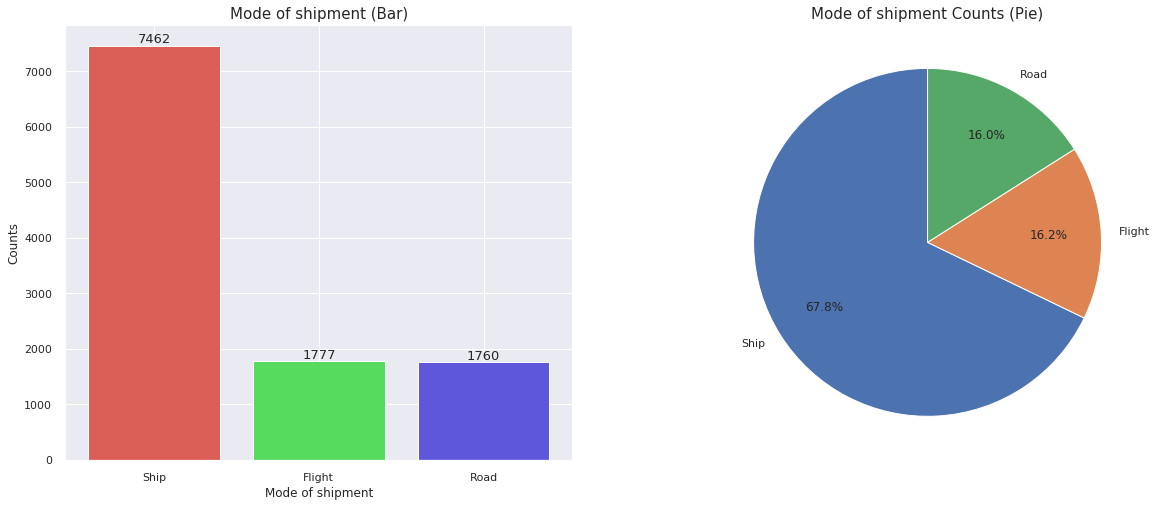

In [113]:
plt.figure(figsize=(20, 8))
axs1 = plt.subplot(1, 2, 1)
axs2 = plt.subplot(1, 2, 2)

# bar
bar = axs1.bar(x_shipment, y_shipment, color=colors)
axs1.set_title('Mode of shipment (Bar)', fontsize=15)
axs1.set_xlabel('Mode of shipment')
axs1.set_ylabel('Counts', rotation=90)

for idx, rect in enumerate(bar):
  axs1.text(idx, rect.get_height() + 50, y_shipment[idx], ha='center', fontsize=13)

# pie
def autopct(pct):
  return ('%.1f%%' % pct) if pct >= 10 else ''

axs2.pie(y_shipment, labels=x_shipment, startangle=90, pctdistance=0.7, autopct=autopct)
axs2.set_title('Mode of shipment Counts (Pie)', fontsize=15)

plt.show()

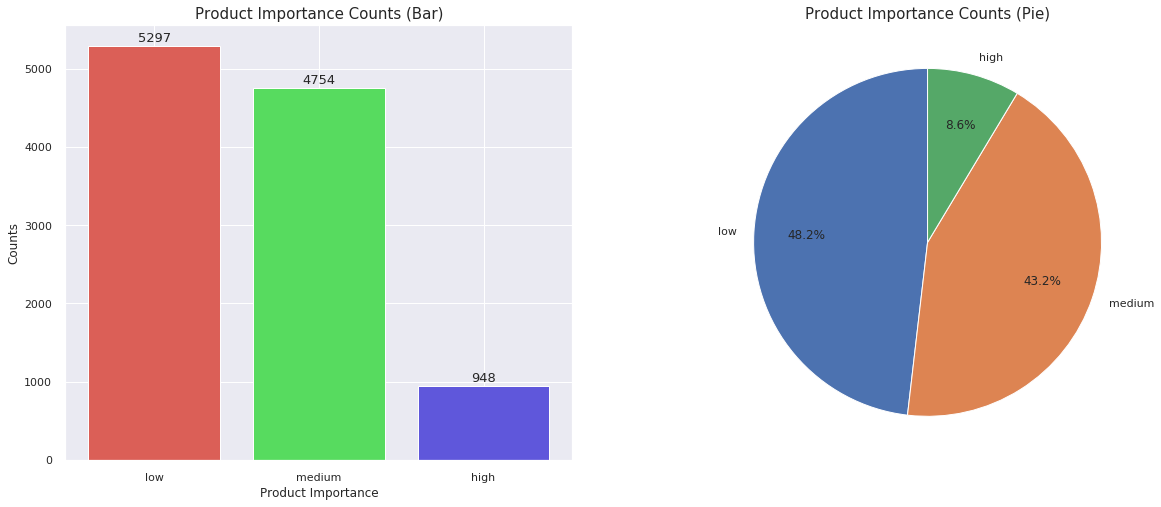

In [114]:
# Product_importance counts
x_importance = df['product_importance'].value_counts().index
y_importance = df['product_importance'].value_counts().values
colors = sns.color_palette('hls', len(x_shipment))

plt.figure(figsize=(20, 8))
axs1 = plt.subplot(1, 2, 1)
axs2 = plt.subplot(1, 2, 2)

# bar
bar = axs1.bar(x_importance, y_importance, color=colors)
axs1.set_title('Product Importance Counts (Bar)', fontsize=15)
axs1.set_xlabel('Product Importance')
axs1.set_ylabel('Counts', rotation=90)

for idx, rect in enumerate(bar):
  axs1.text(idx, rect.get_height() + 50, y_importance[idx], ha='center', fontsize=13)

# pie
def autopct(pct):
  return ('%.1f%%' % pct) if pct >= 5 else ''

axs2.pie(y_importance, labels=x_importance, startangle=90, pctdistance=0.7, autopct=autopct)
axs2.set_title('Product Importance Counts (Pie)', fontsize=15)

plt.show()

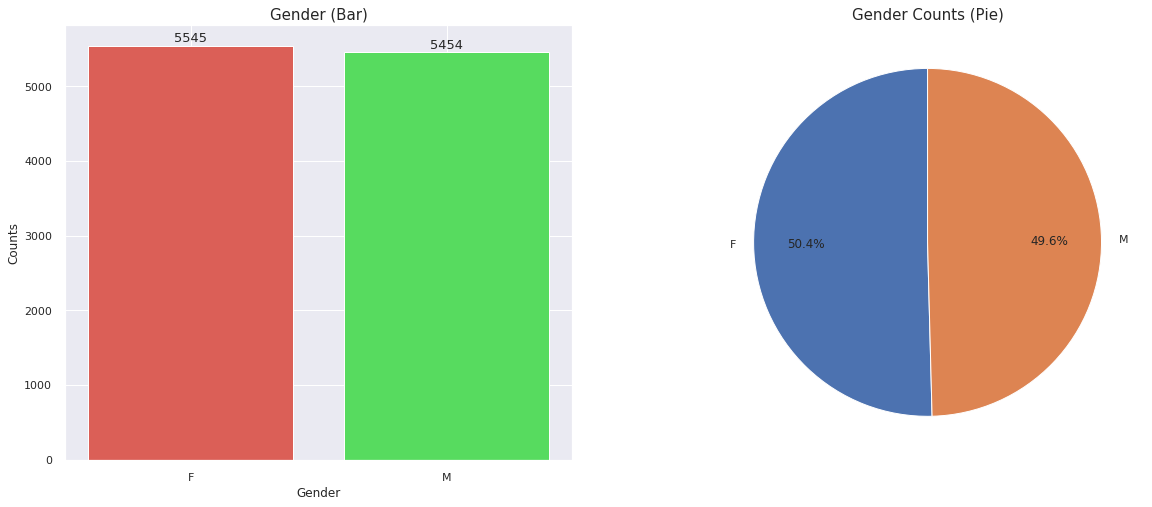

In [115]:
# gender counts
x_gender = df['gender'].value_counts().index
y_gender = df['gender'].value_counts().values
colors = sns.color_palette('hls', len(x_shipment))

plt.figure(figsize=(20, 8))
axs1 = plt.subplot(1, 2, 1)
axs2 = plt.subplot(1, 2, 2)

# bar
bar = axs1.bar(x_gender, y_gender, color=colors)
axs1.set_title('Gender (Bar)', fontsize=15)
axs1.set_xlabel('Gender')
axs1.set_ylabel('Counts', rotation=90)

for idx, rect in enumerate(bar):
  axs1.text(idx, rect.get_height() + 50, y_gender[idx], ha='center', fontsize=13)

# pie
def autopct(pct):
  return ('%.1f%%' % pct) if pct >= 5 else ''

axs2.pie(y_gender, labels=x_gender, startangle=90, pctdistance=0.7, autopct=autopct)
axs2.set_title('Gender Counts (Pie)', fontsize=15)

plt.show()

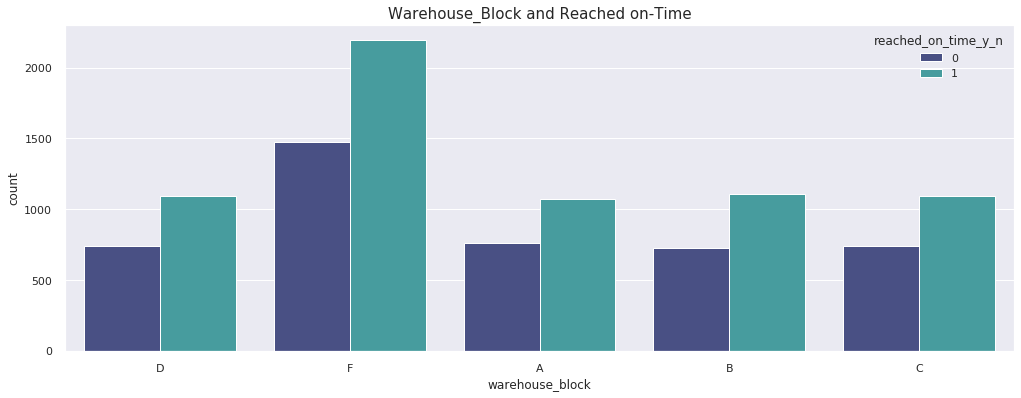

In [116]:
plt.figure(figsize = (17, 6))
sns.countplot('warehouse_block', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Warehouse_Block and Reached on-Time', fontsize=15)
plt.show()

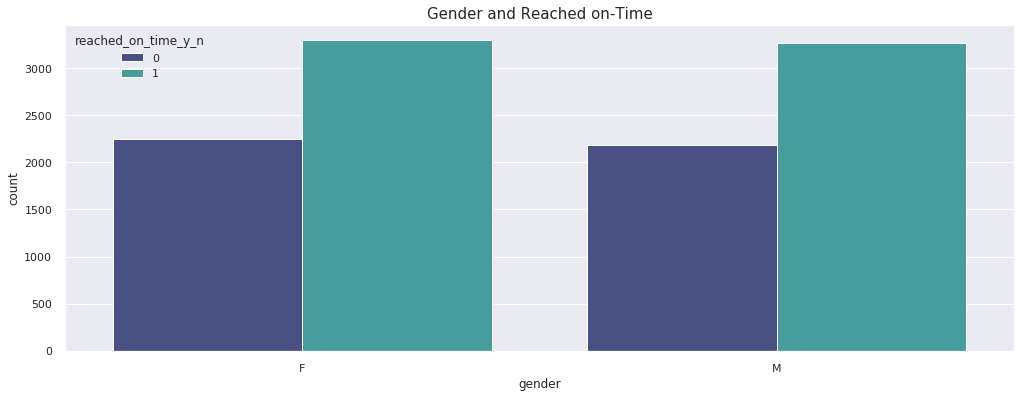

In [117]:
plt.figure(figsize = (17, 6))
sns.countplot('gender', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Gender and Reached on-Time', fontsize=15)
plt.show()

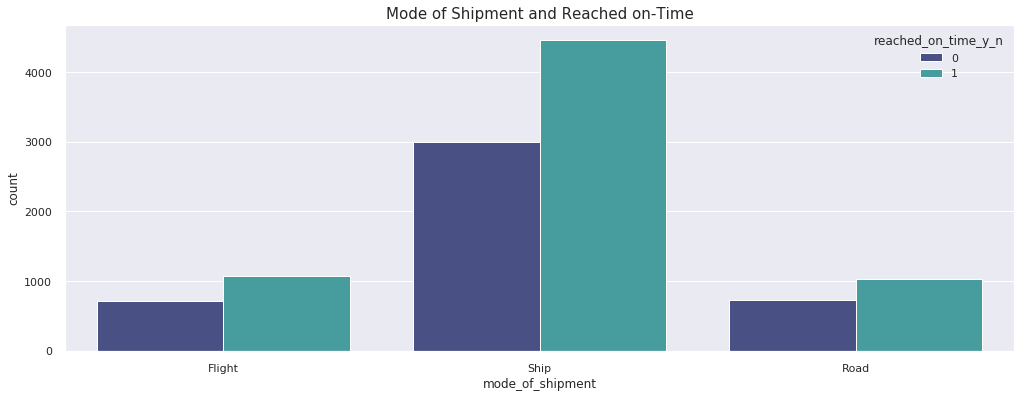

In [118]:
plt.figure(figsize = (17, 6))
sns.countplot('mode_of_shipment', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Mode of Shipment and Reached on-Time', fontsize=15)
plt.show()

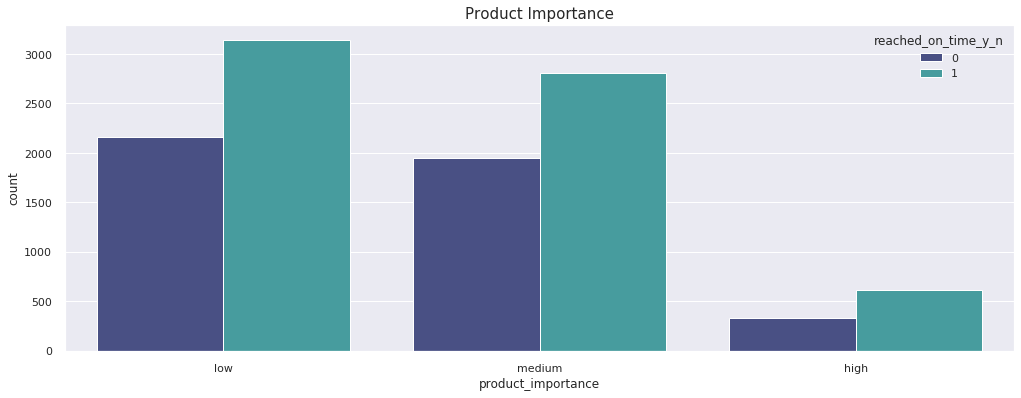

In [119]:
plt.figure(figsize = (17, 6))
sns.countplot('product_importance', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Product Importance', fontsize=15) 
plt.show()

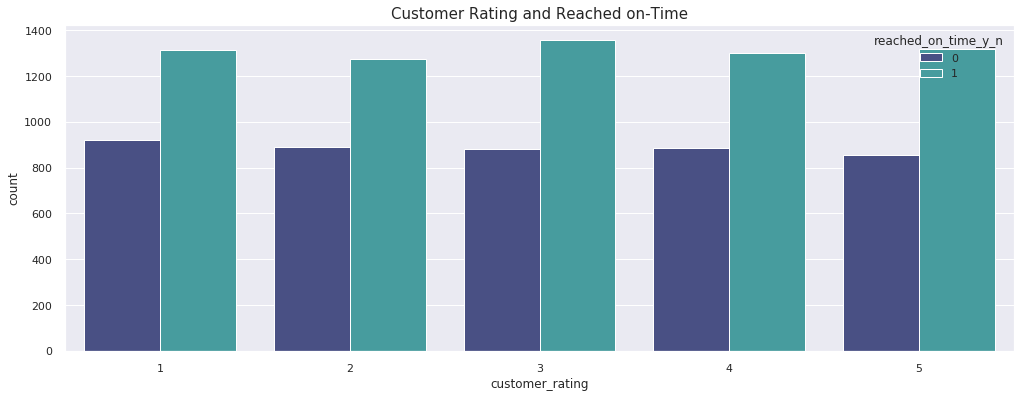

In [120]:
plt.figure(figsize = (17, 6))
sns.countplot('customer_rating', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Customer Rating and Reached on-Time' , fontsize=15)
plt.show()

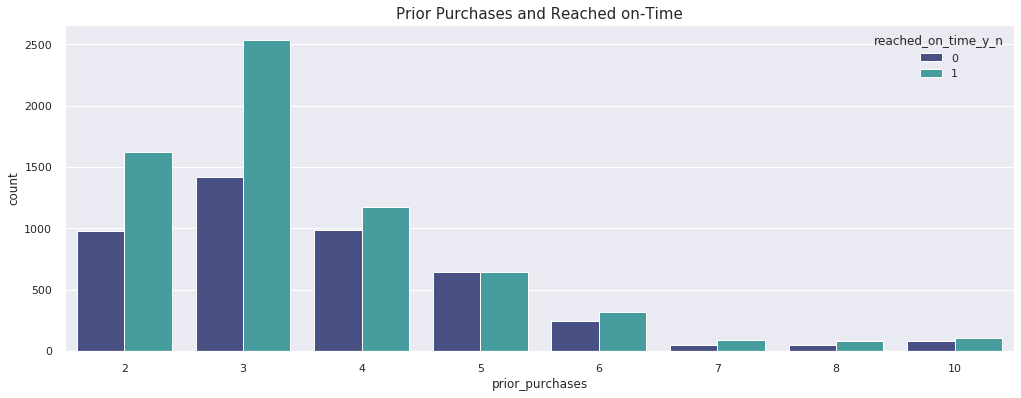

In [121]:
plt.figure(figsize = (17, 6))
sns.countplot('prior_purchases', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Prior Purchases and Reached on-Time' , fontsize=15)
plt.show()

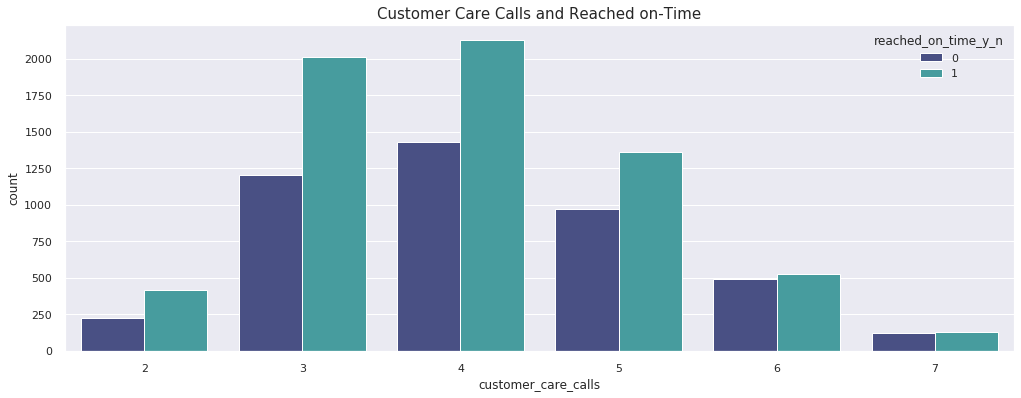

In [122]:
plt.figure(figsize = (17, 6))
sns.countplot('customer_care_calls', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Customer Care Calls and Reached on-Time' , fontsize=15)
plt.show()

In [123]:
fig = px.box(data_frame = df, x = 'reached_on_time_y_n', y = 'cost_of_the_product', 
       color = 'reached_on_time_y_n')
fig.show(renderer='colab')

In [124]:
# 어떤 유형의 운송수단이 가장 많은 중량을 운반하는지 확인

fig = px.histogram(data_frame = df, x = 'weight_in_gms', nbins = 100, color = 'mode_of_shipment',
  marginal = 'box')
fig.show(renderer='colab')

# 배로 운송되는 제품의 수가 가장 많은 것을 알 수 있다

In [125]:
# 배송 방식이 제품 가격에 영향을 미치는지 여부 확인

fig = px.histogram(data_frame = df, x = 'cost_of_the_product', nbins = 100, color = 'mode_of_shipment',
  marginal = 'box')
fig.show(renderer='colab')

In [126]:
# 창고 블록이 제품 가격에 영향을 미치는지 확인

fig = px.histogram(data_frame = df, x = 'cost_of_the_product', nbins = 100, color = 'warehouse_block',
  marginal = 'box')
fig.show(renderer='colab')

# F 창고에 있는 제품들의 금액이 가장 많은 것을 알 수 있다.

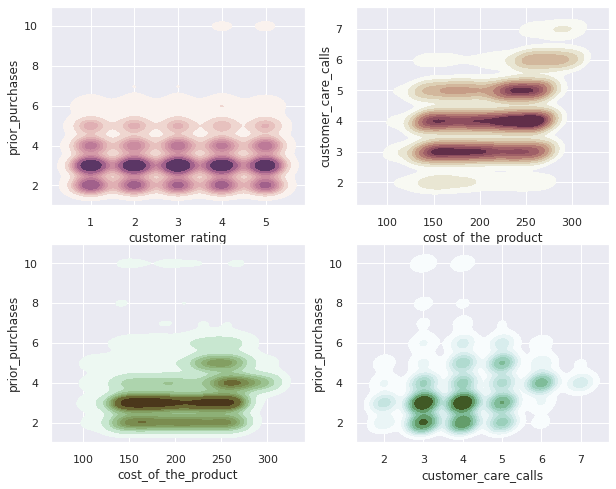

In [127]:
# 각 특성별 분포 kde 확인

f, axes = plt.subplots(2, 2, figsize=(10, 8))


cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
sns.kdeplot(
    data=df, x='customer_rating', y='prior_purchases', cmap=cmap, ax=axes[0, 0], shade=True)

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
sns.kdeplot(
    data=df, x='cost_of_the_product', y='customer_care_calls',cmap=cmap, ax=axes[0, 1], shade=True)

cmap = sns.cubehelix_palette(start=1.0, light=1,as_cmap=True)
sns.kdeplot(
    data=df, x='cost_of_the_product', y='prior_purchases',cmap=cmap, ax=axes[1, 0], shade=True)

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
sns.kdeplot(
    data=df, x='customer_care_calls', y='prior_purchases',cmap=cmap, ax=axes[1, 1], shade=True);


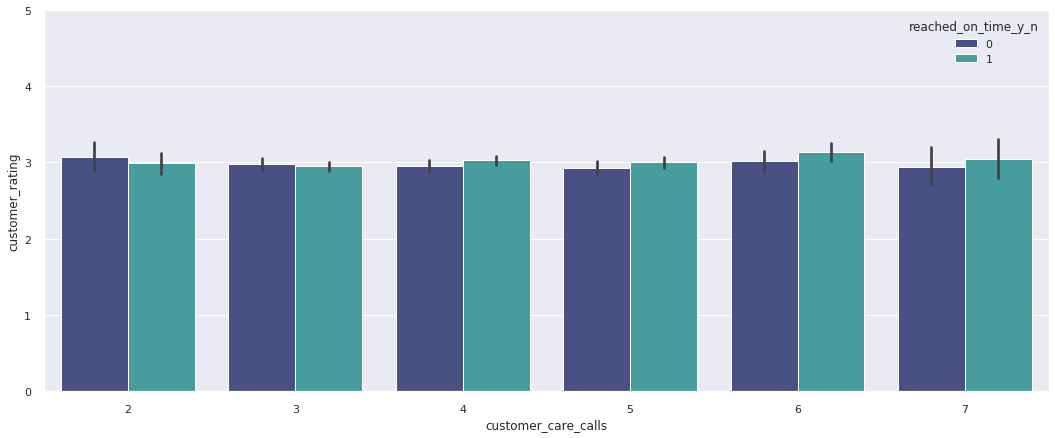

In [128]:
# 정시 배송 도착 여부에 따른 콜센터 전화 여부 및 고객 평가 확인

plt.figure(figsize = (18, 7))
sns.barplot(x = 'customer_care_calls', y = 'customer_rating', hue = 'reached_on_time_y_n', data = df, palette = 'mako')
plt.ylim(0, 5)
plt.show()

# 정시 배송 도착하지 않았을 때 콜센터 전화가 더 많고, 도착했을 때는 전화가 덜 간 것을 확인할 수 있다.

In [129]:
df.groupby('reached_on_time_y_n').mean()

# 정시 도착한 제품은 할인이 된 제품이라고 그렇지 않은 제품은 할인이 없는 제품인 것을 확인할 수 있다.

customer_care_calls  customer_rating  \
reached_on_time_y_n                                         
0                               4.147656         2.967989   
1                               3.991467         3.005790   

                     cost_of_the_product  prior_purchases  discount_offered  \
reached_on_time_y_n                                                           
0                             214.498647         3.670424          5.545987   
1                             207.289197         3.498095         18.663721   

                     weight_in_gms  
reached_on_time_y_n                 
0                      4168.668395  
1                      3272.640104

In [130]:
df.groupby('reached_on_time_y_n').median()

customer_care_calls  customer_rating  \
reached_on_time_y_n                                         
0                                    4.0              3.0   
1                                    4.0              3.0   

                     cost_of_the_product  prior_purchases  discount_offered  \
reached_on_time_y_n                                                           
0                                  222.0              3.0               6.0   
1                                  209.0              3.0               9.0   

                     weight_in_gms  
reached_on_time_y_n                 
0                           4674.0  
1                           3231.0

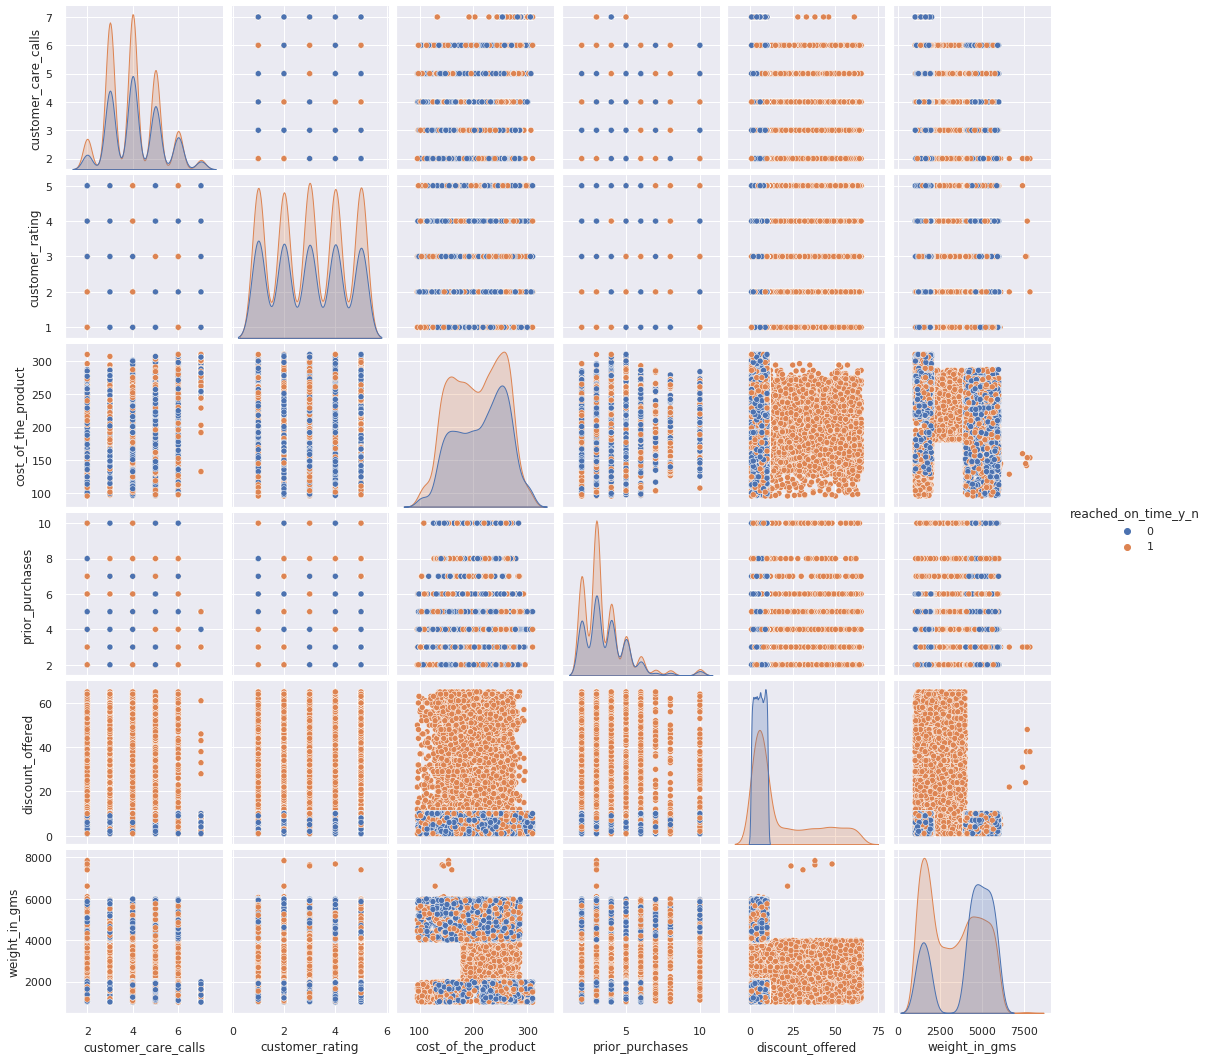

In [131]:
hue = 'reached_on_time_y_n'
sns.pairplot(df.select_dtypes(include=np.number), hue=hue)
plt.show()

# pairplot을 봤을 때는 이것으로 파악하기는 어렵다

In [132]:
# 처음에 내가 생각했던 가설과는 다른 양상을 보여준다.

In [133]:
# 범주형 데이터
cat = df.select_dtypes(include=['object']).columns.values
df_cat = df[cat].copy()
df_cat

warehouse_block mode_of_shipment product_importance gender
0                   D           Flight                low      F
1                   F           Flight                low      M
2                   A           Flight                low      M
3                   B           Flight             medium      M
4                   C           Flight             medium      F
...               ...              ...                ...    ...
10994               A             Ship             medium      F
10995               B             Ship             medium      F
10996               C             Ship                low      F
10997               F             Ship             medium      M
10998               D             Ship                low      F

[10999 rows x 4 columns]

In [134]:
df_ohe = pd.get_dummies(df_cat)
df_ohe

warehouse_block_A  warehouse_block_B  warehouse_block_C  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      1                  0                  0   
3                      0                  1                  0   
4                      0                  0                  1   
...                  ...                ...                ...   
10994                  1                  0                  0   
10995                  0                  1                  0   
10996                  0                  0                  1   
10997                  0                  0                  0   
10998                  0                  0                  0   

       warehouse_block_D  warehouse_block_F  mode_of_shipment_Flight  \
0                      1                  0                        1   
1                      0                  1                        1   
2                      0                  0                        1   
3                      0                  0                        1   
4                      0                  0                        1   
...                  ...                ...                      ...   
10994                  0                  0                        0   
10995                  0                  0                        0   
10996                  0                  0                        0   
10997                  0                  1                        0   
10998                  1                  0                        0   

       mode_of_shipment_Road  mode_of_shipment_Ship  product_importance_high  \
0                          0                      0                        0   
1                          0                      0                        0   
2                          0                      0                        0   
3                          0                      0                        0   
4                          0                      0                        0   
...                      ...                    ...                      ...   
10994                      0                      1                        0   
10995                      0                      1                        0   
10996                      0                      1                        0   
10997                      0                      1                        0   
10998                      0                      1                        0   

       product_importance_low  product_importance_medium  gender_F  gender_M  
0                           1                          0         1         0  
1                           1                          0         0         1  
2                           1                          0         0         1  
3                           0                          1         0         1  
4                           0                          1         1         0  
...                       ...                        ...       ...       ...  
10994                       0                          1         1         0  
10995                       0                          1         1         0  
10996                       1                          0         1         0  
10997                       0                          1         0         1  
10998                       1                          0         1         0  

[10999 rows x 13 columns]

In [135]:
# 숫자형 데이터
num_feat = df.select_dtypes('number').columns.values
df_num = df[num_feat].copy()
df_num

customer_care_calls  customer_rating  cost_of_the_product  \
0                        4                2                  177   
1                        4                5                  216   
2                        2                2                  183   
3                        3                3                  176   
4                        2                2                  184   
...                    ...              ...                  ...   
10994                    4                1                  252   
10995                    4                1                  232   
10996                    5                4                  242   
10997                    5                2                  223   
10998                    2                5                  155   

       prior_purchases  discount_offered  weight_in_gms  reached_on_time_y_n  
0                    3                44           1233                    1  
1                    2                59           3088                    1  
2                    4                48           3374                    1  
3                    4                10           1177                    1  
4                    3                46           2484                    1  
...                ...               ...            ...                  ...  
10994                5                 1           1538                    1  
10995                5                 6           1247                    0  
10996                5                 4           1155                    0  
10997                6                 2           1210                    0  
10998                5                 6           1639                    0  

[10999 rows x 7 columns]

In [136]:
df_num = df_num.drop(['reached_on_time_y_n'], axis=1)

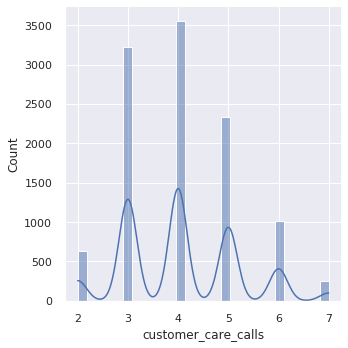

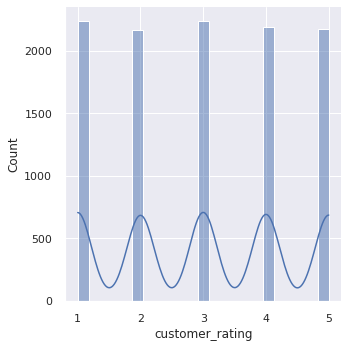

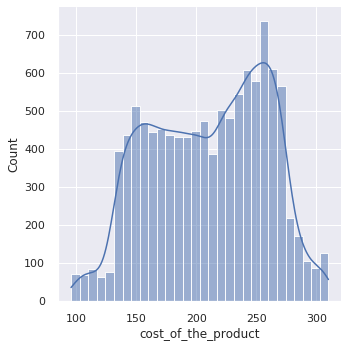

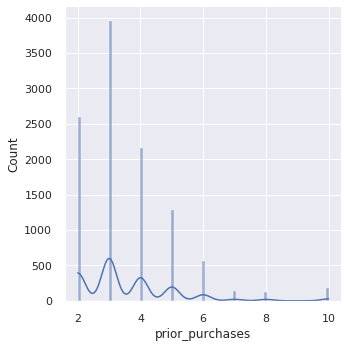

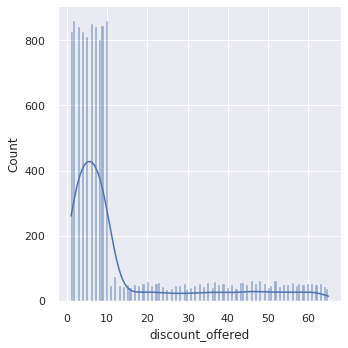

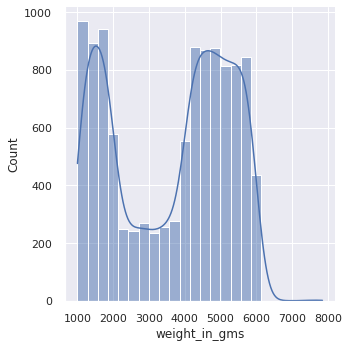

In [137]:
col_att_num = df_num.columns.values

for i in range(0, len(col_att_num)):
  sns.displot(df_num[col_att_num[i]], kde=True)

# 위에서 확인했던데로 할인률은 아래쪽으로 몰려있고, 무게 또한 가볍거나 무겁거나로 치중되어있다

(6.0, 1.0)

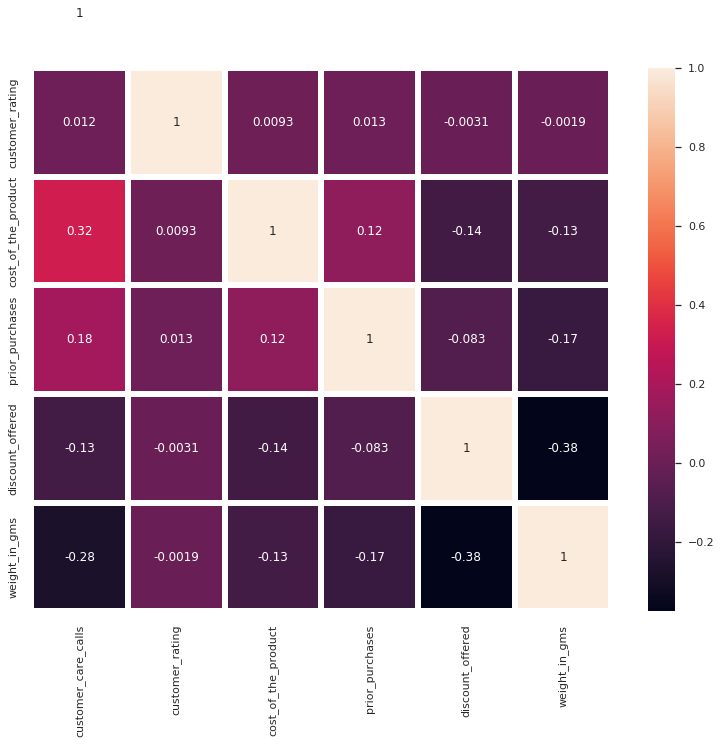

In [283]:
# num 별 높은 상관계수가 있는지 확인

corr = df_num.corr()  
plt.figure(figsize=(13, 10))
ax = sns.heatmap(corr, annot=True, linewidth = 5);

# cut off solution
buttom, top = ax.get_ylim()
ax.set_ylim(buttom+0.5, top+0.5)

# 높은 corr은 없는 것으로 확인

In [139]:
df_ohe.nunique()

warehouse_block_A            2
warehouse_block_B            2
warehouse_block_C            2
warehouse_block_D            2
warehouse_block_F            2
mode_of_shipment_Flight      2
mode_of_shipment_Road        2
mode_of_shipment_Ship        2
product_importance_high      2
product_importance_low       2
product_importance_medium    2
gender_F                     2
gender_M                     2
dtype: int64

(20.0, 1.0)

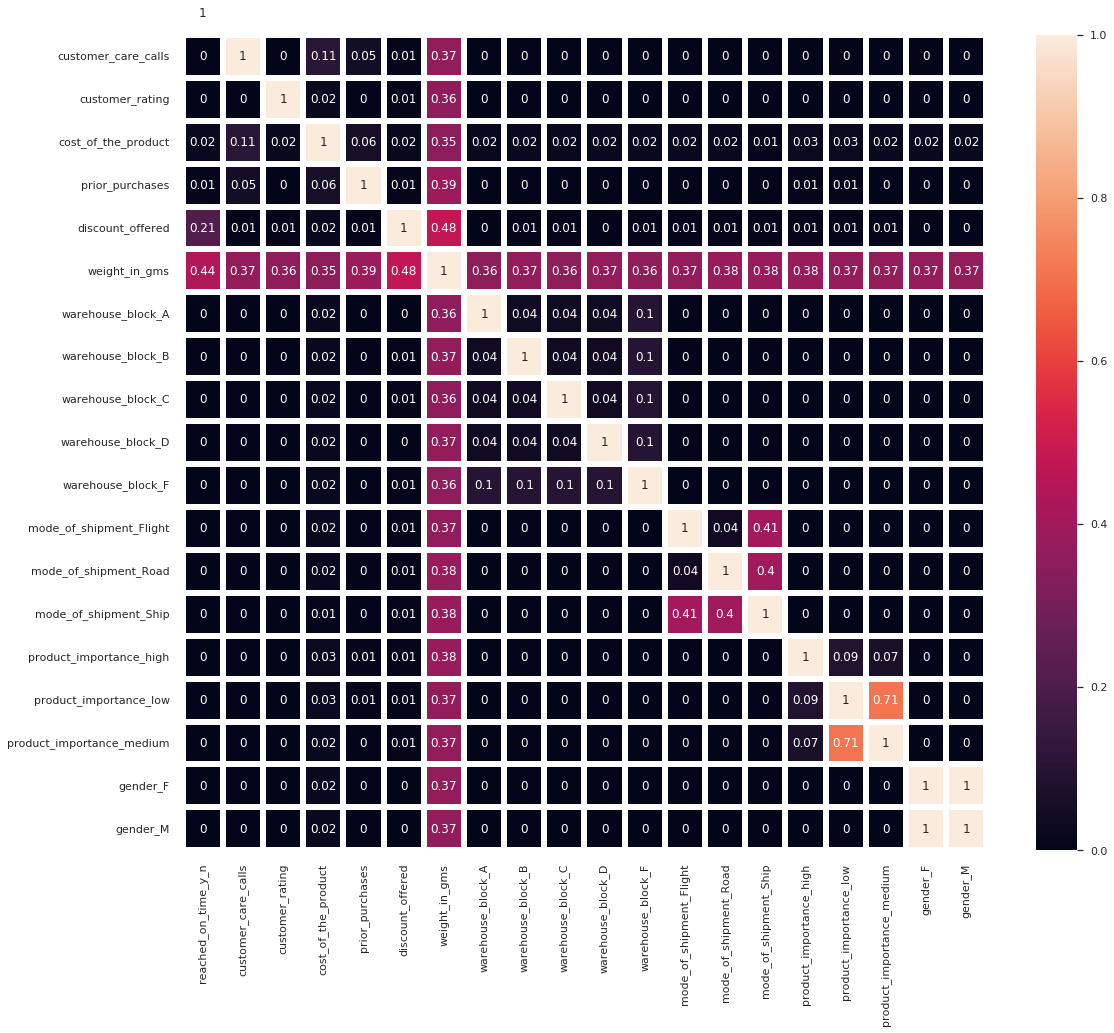

In [284]:
from scipy.stats import chi2_contingency

def cramers_V(var_1, var_2):
  crosstab = np.array(pd.crosstab(var_1, var_2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape) - 1
  
  return (stat / (obs * mini))

rows = []

for var_1 in df_ohe:
  col = []
  for var_2 in df_ohe:
    cramers = cramers_V(df_ohe[var_1], df_ohe[var_2])
    col.append(round(cramers, 2))
  rows.append(col)

cra_results = np.array(rows)
df_ohe_chi2_corr = pd.DataFrame(cra_results, columns = df_ohe.columns, index=df_ohe.columns)
plt.figure(figsize=(18 ,15))
ax = sns.heatmap(df_ohe_chi2_corr, annot=True, linewidth = 5);
buttom, top = ax.get_ylim()
ax.set_ylim(buttom+0.5, top+0.5)

In [141]:
# 데이터 합치기
df_ohe = pd.concat([df['reached_on_time_y_n'], df_num, df_ohe], axis = 1)
print(df_ohe.columns)
df_ohe.head()

Index(['reached_on_time_y_n', 'customer_care_calls', 'customer_rating',
       'cost_of_the_product', 'prior_purchases', 'discount_offered',
       'weight_in_gms', 'warehouse_block_A', 'warehouse_block_B',
       'warehouse_block_C', 'warehouse_block_D', 'warehouse_block_F',
       'mode_of_shipment_Flight', 'mode_of_shipment_Road',
       'mode_of_shipment_Ship', 'product_importance_high',
       'product_importance_low', 'product_importance_medium', 'gender_F',
       'gender_M'],
      dtype='object')


reached_on_time_y_n  customer_care_calls  customer_rating  \
0                    1                    4                2   
1                    1                    4                5   
2                    1                    2                2   
3                    1                    3                3   
4                    1                    2                2   

   cost_of_the_product  prior_purchases  discount_offered  weight_in_gms  \
0                  177                3                44           1233   
1                  216                2                59           3088   
2                  183                4                48           3374   
3                  176                4                10           1177   
4                  184                3                46           2484   

   warehouse_block_A  warehouse_block_B  warehouse_block_C  warehouse_block_D  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  0   
2                  1                  0                  0                  0   
3                  0                  1                  0                  0   
4                  0                  0                  1                  0   

   warehouse_block_F  mode_of_shipment_Flight  mode_of_shipment_Road  \
0                  0                        1                      0   
1                  1                        1                      0   
2                  0                        1                      0   
3                  0                        1                      0   
4                  0                        1                      0   

   mode_of_shipment_Ship  product_importance_high  product_importance_low  \
0                      0                        0                       1   
1                      0                        0                       1   
2                      0                        0                       1   
3                      0                        0                       0   
4                      0                        0                       0   

   product_importance_medium  gender_F  gender_M  
0                          0         1         0  
1                          0         0         1  
2                          0         0         1  
3                          1         0         1  
4                          1         1         0

In [142]:
target = 'reached_on_time_y_n'

In [143]:
X = df_ohe.drop(target, axis = 1)
y = df_ohe[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.3, random_state=42)

In [144]:
X_train.shape,X_val.shape, X_test.shape

((5389, 19), (2310, 19), (3300, 19))

## 모델 생성

In [145]:
# SVM
# StandardScaler()
from sklearn import svm

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc = sc.transform(X_val)
X_test_sc = sc.transform(X_test)

In [146]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train_sc, y_train)

X_test_pred = clf.predict(X_val_sc)

In [147]:
print("Acc score : {}".format(accuracy_score(y_val, X_test_pred.round(), normalize=True)))
print(classification_report(y_val, X_test_pred))

Acc score : 0.6545454545454545
              precision    recall  f1-score   support

           0       0.55      0.73      0.63       930
           1       0.77      0.61      0.68      1380

    accuracy                           0.65      2310
   macro avg       0.66      0.67      0.65      2310
weighted avg       0.68      0.65      0.66      2310



In [148]:
# MinMaxSC
X_nor = MinMaxScaler().fit_transform(X)

X_n = SelectKBest(chi2, k = 6).fit_transform(X_nor, y)


X_train_sb, X_test_sb, y_train_sb, y_test_sb = train_test_split(X_n, y, test_size=.3)
X_train_sb, X_val_sb, y_train_sb, y_val_sb = train_test_split(X_train_sb, y_train_sb, test_size=.3)

In [149]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train_sb, y_train_sb)
X_val_pred_sb = clf.predict(X_val_sb)

In [150]:
print("Acc score : {}".format(accuracy_score(y_val_sb, X_val_pred_sb.round(), normalize=True)))
print(classification_report(y_val_sb, X_val_pred_sb))

Acc score : 0.6692640692640692
              precision    recall  f1-score   support

           0       0.56      0.71      0.63       905
           1       0.78      0.64      0.70      1405

    accuracy                           0.67      2310
   macro avg       0.67      0.68      0.67      2310
weighted avg       0.69      0.67      0.67      2310



In [151]:
# base line
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [152]:
print("Acc score : {}".format(accuracy_score(y_val, y_pred.round(), normalize=True)))

Acc score : 0.651082251082251


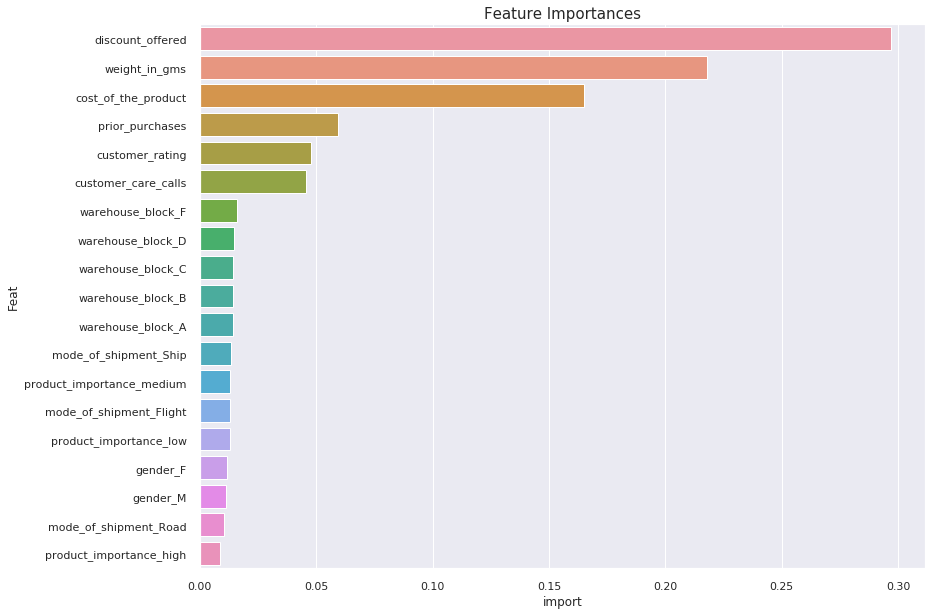

In [153]:
# Feature Importances

feature = X.columns.values
feat_impor = rf.feature_importances_
f_i = pd.DataFrame({'Feat':feature, 'import':feat_impor})
f_i_sv = f_i.sort_values('import', ascending=False).copy()

plt.figure(figsize=(13, 10))
sns.barplot(data=f_i_sv, x='import', y='Feat')
plt.title('Feature Importances', fontsize=15);


# 제품의 할인률, 제품의 무게, 제품 가격에 의해서 정시배송 여부가 판단이 날 수 있다.

In [154]:
x_imp = f_i_sv['Feat']
y_imp = f_i_sv['import']

In [155]:
# Initialize figure
fig = go.Figure()

fig.add_trace(
    go.Bar(x=x_imp[:5],
           y=y_imp[:5],
           name="Top 5",
          marker={'color': y_imp[:5],'colorscale': 'Earth'}))

fig.add_trace(
    go.Bar(x=x_imp[:10],
           y=y_imp[:10],
           name="Top 10",
           marker={'color': y_imp[:10],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=x_imp,
           y=y_imp,
           name="All",
           marker={'color': y_imp,'colorscale': 'Earth'},
               visible=False ))

buttons = []
tops = ['Top 5', 'Top 10', 'All']
for i, top in enumerate(tops):
    buttons.append(dict(
        label=top,
        method="update",
        # 버튼 클릭 시 변경 
        # ([True, Fales, Fales, Fales, False])
        # ([Fales, True, Fales, Fales, False])
        # ([Fales, Fales, True, Fales, False])
        # ([Fales, Fales, Fales, True, False])
        # ([Fales, Fales, Fales, False, True])
        args=[{"visible": [False] * i + [True] + [False] * (3-i+1)},
              # sub title
              {"title": f"North America Game Sales {top}"}]
    ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            active=0,
            x=0.57,
            y=1.2,
            buttons=buttons,
          )
    ])

fig.update_layout(
    # sup title
    title_text="North America Game Sales Rankings",
    xaxis_domain=[0.05, 1.0]
)

fig.show(renderer='colab')

In [156]:
base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(baseline_acc)

In [157]:
# XGBoost

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)
y_pred_proba_1 = xgb.predict_proba(X_val)[:, 1]

In [158]:
xgb_roc_score_n = roc_auc_score(y_val, y_pred_proba_1,average='macro')
print("Acc score : {}".format(accuracy_score(y_val, y_pred.round(), normalize=True)))
print(xgb_roc_score_n)

Acc score : 0.6528138528138528
0.7415194015895279


In [175]:
X_train

customer_care_calls  customer_rating  cost_of_the_product  \
1630                     6                2                  286   
3587                     5                1                  194   
8063                     3                2                  235   
8647                     6                1                  285   
10744                    5                4                  236   
...                    ...              ...                  ...   
5223                     5                1                  257   
10820                    4                1                  157   
9602                     3                4                  155   
64                       4                5                  261   
1081                     6                3                  270   

       prior_purchases  discount_offered  weight_in_gms  warehouse_block_A  \
1630                 7                65           3362                  0   
3587                 7                 8           4770                  0   
8063                 2                10           4172                  0   
8647                 4                 3           1448                  0   
10744                5                 7           1017                  0   
...                ...               ...            ...                ...   
5223                 4                 1           4924                  0   
10820                5                10           4871                  1   
9602                 3                 9           5718                  1   
64                   2                49           3045                  0   
1081                 3                56           3251                  0   

       warehouse_block_B  warehouse_block_C  warehouse_block_D  \
1630                   0                  1                  0   
3587                   0                  0                  0   
8063                   0                  0                  0   
8647                   0                  0                  0   
10744                  0                  1                  0   
...                  ...                ...                ...   
5223                   1                  0                  0   
10820                  0                  0                  0   
9602                   0                  0                  0   
64                     0                  1                  0   
1081                   0                  0                  0   

       warehouse_block_F  mode_of_shipment_Flight  mode_of_shipment_Road  \
1630                   0                        0                      1   
3587                   1                        0                      0   
8063                   1                        0                      1   
8647                   1                        1                      0   
10744                  0                        0                      0   
...                  ...                      ...                    ...   
5223                   0                        0                      0   
10820                  0                        1                      0   
9602                   0                        1                      0   
64                     0                        0                      0   
1081                   1                        0                      1   

       mode_of_shipment_Ship  product_importance_high  product_importance_low  \
1630                       0                        0                       0   
3587                       1                        0                       0   
8063                       0                        0                       0   
8647                       0                        0                       1   
10744                      1                        0                       0   
...                      ...                      ...        

In [178]:
# !pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.5 MB/s 


In [183]:
from category_encoders import OrdinalEncoder

enc = OrdinalEncoder()
X_train_enc = enc.fit_transform(X_train)
X_val_enc = enc.transform(X_val)
X_test_enc = enc.transform(X_test)

In [221]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

xgb_1 = XGBClassifier(
    objective="binary:logistic",
)

params = {
"learning_rate" : [0.05,0.01,0.1,0.15,0.2,0.25,0.3],
"max_depth" : [1, 2, 3, 4, 5, 6, 8, 10, 12, 15],
"min_child_weight" : [ 1, 3, 5, 7 ],
"gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
"n_estimators" : [100, 200, 300, 400, 500, 600, 700],
"subsample" : [0.6, 0.7, 0.8, 0.9, 1.0]
}

clf = RandomizedSearchCV(
    xgb_1,
    param_distributions=params,
    scoring="roc_auc",
    n_iter=10,
    cv=5,
    random_state=42,
)
# best_model = clf.best_estimator_
eval_set = [(X_train, y_train), (X_val, y_val)]

clf.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=50)

print("Optimal Hyperparameter:", clf.best_params_)
print("AUC:", clf.best_score_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[247]	validation_0-logloss:0.51219	validation_1-logloss:0.51793
[248]	validation_0-logloss:0.51218	validation_1-logloss:0.51791
[249]	validation_0-logloss:0.51216	validation_1-logloss:0.51784
[250]	validation_0-logloss:0.51215	validation_1-logloss:0.51781
[251]	validation_0-logloss:0.51213	validation_1-logloss:0.51779
[252]	validation_0-logloss:0.51211	validation_1-logloss:0.51787
[253]	validation_0-logloss:0.51207	validation_1-logloss:0.51789
[254]	validation_0-logloss:0.51205	validation_1-logloss:0.51786
[255]	validation_0-logloss:0.51200	validation_1-logloss:0.51782
[256]	validation_0-logloss:0.51197	validation_1-logloss:0.51780
[257]	validation_0-logloss:0.51197	validation_1-logloss:0.51777
[258]	validation_0-logloss:0.51197	validation_1-logloss:0.51780
[259]	validation_0-logloss:0.51194	validation_1-logloss:0.51778
[260]	validation_0-logloss:0.51192	validation_1-logloss:0.51779
[261]	validation_0-logloss:0.51187	validation_1-logloss:0.51774
[262

In [193]:
xgb_3 = XGBClassifier (
    objective="binary:logistic",
    subsample = 0.7,
    n_estimators = 500,
    min_child_weight = 7,
    max_depth = 2,
    learning_rate = 0.01,
    gamma = 0.2,
    colsample_bytree = 0.7
)

eval_set = [(X_train, y_train), (X_val, y_val)]

xgb_3.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=50)
y_pred_proba = xgb_3.predict_proba(X_val)

xgb_roc_score_n = roc_auc_score(y_val, y_pred_proba[:, 1])
print("AUC:", xgb_roc_score_n)

[0]	validation_0-logloss:0.69061	validation_1-logloss:0.69067
[1]	validation_0-logloss:0.68814	validation_1-logloss:0.68825
[2]	validation_0-logloss:0.68602	validation_1-logloss:0.68610
[3]	validation_0-logloss:0.68395	validation_1-logloss:0.68401
[4]	validation_0-logloss:0.68205	validation_1-logloss:0.68216
[5]	validation_0-logloss:0.67971	validation_1-logloss:0.67988
[6]	validation_0-logloss:0.67744	validation_1-logloss:0.67765
[7]	validation_0-logloss:0.67518	validation_1-logloss:0.67545
[8]	validation_0-logloss:0.67326	validation_1-logloss:0.67351
[9]	validation_0-logloss:0.67108	validation_1-logloss:0.67138
[10]	validation_0-logloss:0.66893	validation_1-logloss:0.66929
[11]	validation_0-logloss:0.66712	validation_1-logloss:0.66744
[12]	validation_0-logloss:0.66531	validation_1-logloss:0.66561
[13]	validation_0-logloss:0.66328	validation_1-logloss:0.66363
[14]	validation_0-logloss:0.66130	validation_1-logloss:0.66169
[15]	validation_0-logloss:0.65933	validation_1-logloss:0.65978
[1

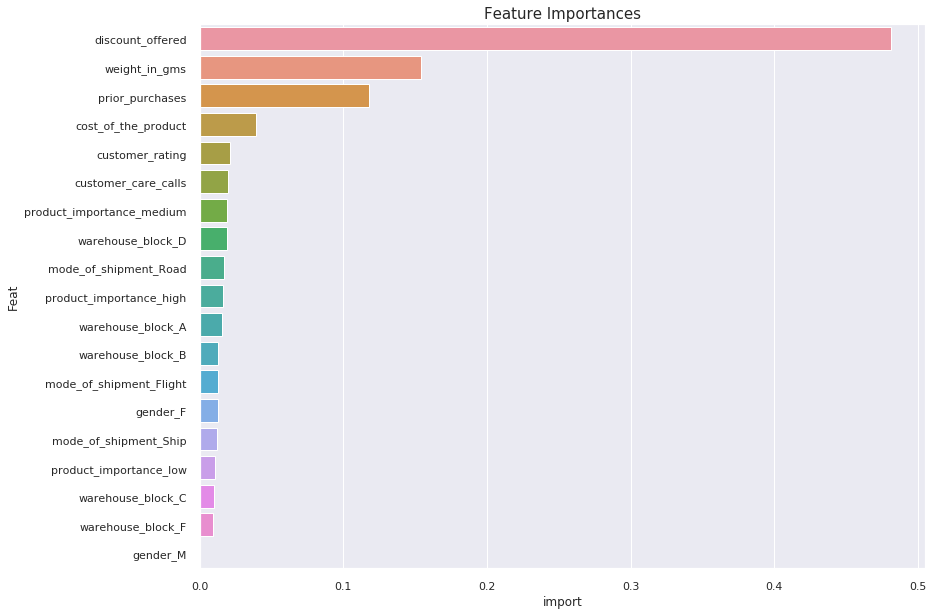

In [222]:
# XGBoost Feature Importances

feature = X.columns.values
feat_impor = xgb_3.feature_importances_
f_i = pd.DataFrame({'Feat':feature, 'import':feat_impor})
f_i_sv = f_i.sort_values('import', ascending=False).copy()

plt.figure(figsize=(13, 10))
sns.barplot(data=f_i_sv, x='import', y='Feat')
plt.title('Feature Importances', fontsize=15);

In [223]:
x_imp = f_i_sv['Feat']
y_imp = f_i_sv['import']

In [224]:
# Initialize figure
fig = go.Figure()

fig.add_trace(
    go.Bar(x=x_imp[:5],
           y=y_imp[:5],
           name="Top 5",
          marker={'color': y_imp[:5],'colorscale': 'Earth'}))

fig.add_trace(
    go.Bar(x=x_imp[:10],
           y=y_imp[:10],
           name="Top 10",
           marker={'color': y_imp[:10],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=x_imp,
           y=y_imp,
           name="All",
           marker={'color': y_imp,'colorscale': 'Earth'},
               visible=False ))

buttons = []
tops = ['Top 5', 'Top 10', 'All']
for i, top in enumerate(tops):
    buttons.append(dict(
        label=top,
        method="update",
        # 버튼 클릭 시 변경 
        # ([True, Fales, Fales, Fales, False])
        # ([Fales, True, Fales, Fales, False])
        # ([Fales, Fales, True, Fales, False])
        # ([Fales, Fales, Fales, True, False])
        # ([Fales, Fales, Fales, False, True])
        args=[{"visible": [False] * i + [True] + [False] * (3-i+1)},
              # sub title
              {"title": f"North America Game Sales {top}"}]
    ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            active=0,
            x=0.57,
            y=1.2,
            buttons=buttons,
          )
    ])

fig.update_layout(
    # sup title
    title_text="North America Game Sales Rankings",
    xaxis_domain=[0.05, 1.0]
)

fig.show(renderer='colab')

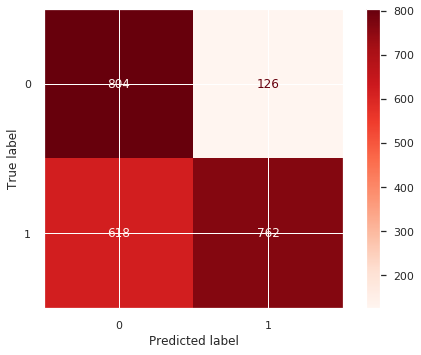

In [228]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb_3, X_val, y_val, cmap=plt.cm.Reds);

## **SelectKBest**

In [243]:
select = SelectKBest(chi2, k=6)
X_n_1 = select.fit_transform(X, y)

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
    X_n_1, y, test_size=.3
)
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(
    X_n_1, y, test_size=.3
)

In [232]:
xgb_4 = XGBClassifier(
    objective="binary:logistic",
)

params = {
"learning_rate" : [0.05,0.01,0.1,0.15,0.2,0.25,0.3],
"max_depth" : [1, 2, 3, 4, 5, 6, 8, 10, 12, 15],
"min_child_weight" : [ 1, 3, 5, 7 ],
"gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
"n_estimators" : [100, 200, 300, 400, 500, 600, 700],
"subsample" : [0.6, 0.7, 0.8, 0.9, 1.0]
}

clf = RandomizedSearchCV(
    xgb_4,
    param_distributions=params,
    scoring="roc_auc",
    n_iter=10,
    cv=5,
    random_state=42,
)
# best_model = clf.best_estimator_
eval_set = [(X_train_n, y_train_n), (X_val_n, y_val_n)]

clf.fit(X_train_n, y_train_n, eval_set=eval_set, early_stopping_rounds=50)

print("Optimal Hyperparameter:", clf.best_params_)
print("AUC:", clf.best_score_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[369]	validation_0-logloss:0.50920	validation_1-logloss:0.51837
[370]	validation_0-logloss:0.50919	validation_1-logloss:0.51839
[371]	validation_0-logloss:0.50916	validation_1-logloss:0.51834
[372]	validation_0-logloss:0.50914	validation_1-logloss:0.51841
[373]	validation_0-logloss:0.50912	validation_1-logloss:0.51836
[374]	validation_0-logloss:0.50911	validation_1-logloss:0.51835
[375]	validation_0-logloss:0.50908	validation_1-logloss:0.51829
[376]	validation_0-logloss:0.50906	validation_1-logloss:0.51830
[377]	validation_0-logloss:0.50903	validation_1-logloss:0.51825
[378]	validation_0-logloss:0.50903	validation_1-logloss:0.51826
[379]	validation_0-logloss:0.50899	validation_1-logloss:0.51820
[380]	validation_0-logloss:0.50897	validation_1-logloss:0.51821
[381]	validation_0-logloss:0.50893	validation_1-logloss:0.51813
[382]	validation_0-logloss:0.50891	validation_1-logloss:0.51815
[383]	validation_0-logloss:0.50890	validation_1-logloss:0.51810
[384

In [233]:
y_pred_proba = clf.predict_proba(X_val_n)
print("Optimal Hyperparameter:", clf.best_params_)
print("AUC:", clf.best_score_)
print("AUC:", roc_auc_score(y_val_n, y_pred_proba[:, 1]))

Optimal Hyperparameter: {'subsample': 0.9, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.5}
AUC: 0.7454724509096151
AUC: 0.7359401655911586


In [234]:
xgb_5 = XGBClassifier (
    objective="binary:logistic",
    subsample = 0.9,
    n_estimators = 400,
    min_child_weight = 1,
    max_depth = 2,
    learning_rate = 0.15,
    gamma = 0.2,
    colsample_bytree = 0.5
)

eval_set = [(X_train_n, y_train_n), (X_val_n, y_val_n)]

xgb_5.fit(X_train_n, y_train_n, eval_set=eval_set, early_stopping_rounds=50)
y_pred_proba = xgb_5.predict_proba(X_val_n)

xgb_roc_score_n = roc_auc_score(y_val_n, y_pred_proba[:, 1])
print("AUC:", xgb_roc_score_n)

[0]	validation_0-logloss:0.65738	validation_1-logloss:0.65792
[1]	validation_0-logloss:0.65278	validation_1-logloss:0.65233
[2]	validation_0-logloss:0.63080	validation_1-logloss:0.63227
[3]	validation_0-logloss:0.61057	validation_1-logloss:0.61202
[4]	validation_0-logloss:0.59615	validation_1-logloss:0.59861
[5]	validation_0-logloss:0.58367	validation_1-logloss:0.58651
[6]	validation_0-logloss:0.57180	validation_1-logloss:0.57479
[7]	validation_0-logloss:0.56192	validation_1-logloss:0.56530
[8]	validation_0-logloss:0.56065	validation_1-logloss:0.56357
[9]	validation_0-logloss:0.55967	validation_1-logloss:0.56215
[10]	validation_0-logloss:0.55164	validation_1-logloss:0.55453
[11]	validation_0-logloss:0.54562	validation_1-logloss:0.54903
[12]	validation_0-logloss:0.53984	validation_1-logloss:0.54340
[13]	validation_0-logloss:0.53498	validation_1-logloss:0.53872
[14]	validation_0-logloss:0.53083	validation_1-logloss:0.53492
[15]	validation_0-logloss:0.52735	validation_1-logloss:0.53171
[1

In [ ]:
# 오히려 SelectKBest 적용 후 features가 6개 있을 때와 별반 차이가 없는 걸 확인할 수 있다.

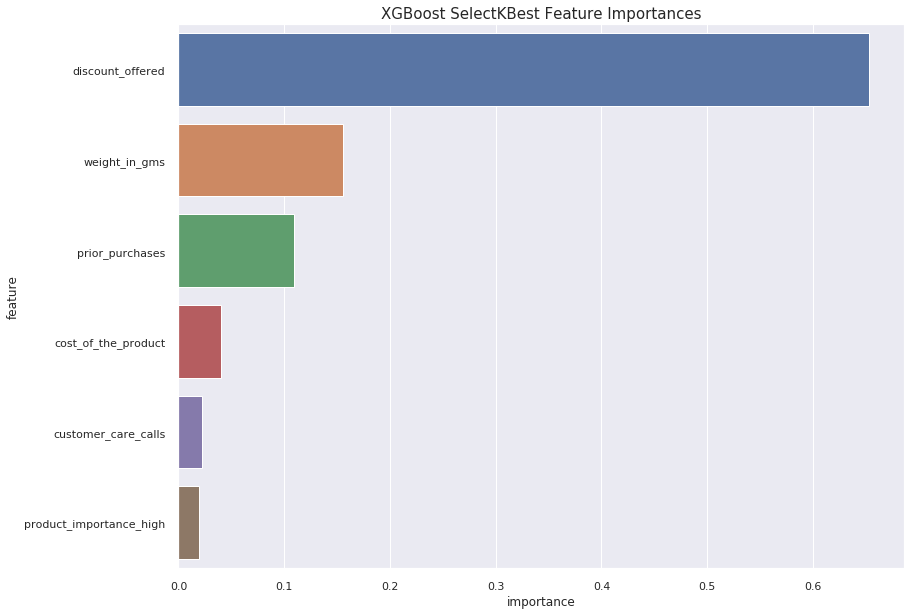

In [255]:
# XGBoost Feature Importances
all_names = X_train.columns
select.get_support()

selected_mask = select.get_support()
selected_names = all_names[selected_mask]

features = selected_names
feat_import = xgb_5.feature_importances_
f_i_1 = pd.DataFrame({'feature':features, 'importance':feat_import})
f_i_sv_1 = f_i_1.sort_values('importance', ascending=False).copy()

plt.figure(figsize=(13, 10))
sns.barplot(data=f_i_sv_1, x='importance', y='feature')
plt.title('XGBoost SelectKBest Feature Importances', fontsize=15);

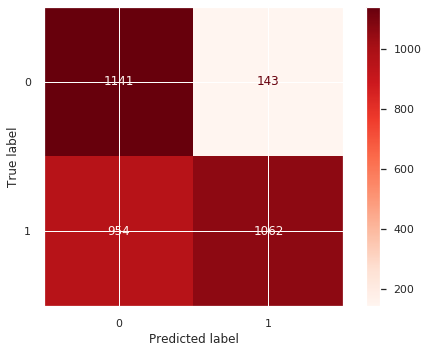

In [229]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb_5, X_val_n, y_val_n, cmap=plt.cm.Reds);

In [308]:
# 최종 모델 평가

y_pred_proba = xgb_3.predict_proba(X_test)
y_pred = xgb_3.predict(X_test)
print("AUC:", roc_auc_score(y_test, y_pred_proba[:, 1]))
print(classification_report(y_test, y_pred))

AUC: 0.7436352106541688
              precision    recall  f1-score   support

           0       0.56      0.87      0.68      1312
           1       0.86      0.56      0.68      1988

    accuracy                           0.68      3300
   macro avg       0.71      0.71      0.68      3300
weighted avg       0.74      0.68      0.68      3300



In [169]:
!pip3 install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [302]:
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.inspection import plot_partial_dependence, partial_dependence

In [305]:
X_val

customer_care_calls  customer_rating  cost_of_the_product  \
8476                     5                1                  258   
9548                     4                1                  173   
10733                    5                1                  251   
6242                     4                5                  251   
2506                     5                4                  243   
...                    ...              ...                  ...   
1376                     5                1                  274   
2863                     5                4                  239   
5184                     3                2                  111   
7790                     3                1                  151   
6437                     4                1                  171   

       prior_purchases  discount_offered  weight_in_gms  warehouse_block_A  \
8476                 6                 7           4344                  0   
9548                 2                 5           4688                  1   
10733                6                 5           1827                  0   
6242                 2                 8           5232                  1   
2506                 3                35           2899                  0   
...                ...               ...            ...                ...   
1376                 3                58           2098                  1   
2863                 2                35           2107                  0   
5184                 2                 4           4245                  0   
7790                 2                 7           4437                  1   
6437                 4                 2           5082                  0   

       warehouse_block_B  warehouse_block_C  warehouse_block_D  \
8476                   0                  1                  0   
9548                   0                  0                  0   
10733                  0                  0                  0   
6242                   0                  0                  0   
2506                   0                  1                  0   
...                  ...                ...                ...   
1376                   0                  0                  0   
2863                   0                  0                  0   
5184                   0                  0                  1   
7790                   0                  0                  0   
6437                   0                  0                  0   

       warehouse_block_F  mode_of_shipment_Flight  mode_of_shipment_Road  \
8476                   0                        0                      1   
9548                   0                        0                      0   
10733                  1                        0                      0   
6242                   0                        0                      0   
2506                   0                        0                      0   
...                  ...                      ...                    ...   
1376                   0                        1                      0   
2863                   1                        0                      1   
5184                   0                        0                      1   
7790                   0                        0                      1   
6437                   1                        1                      0   

       mode_of_shipment_Ship  product_importance_high  product_importance_low  \
8476                       0                        0                       1   
9548                       1                        0                       1   
10733                      1                        0                       1   
6242                       1                        0                       0   
2506                       1                        0                       1   
...                      ...                      ...        

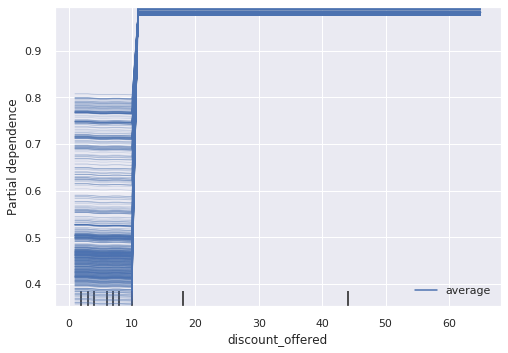

In [306]:
plot_partial_dependence(xgb_3, X_val, [4], kind='both')

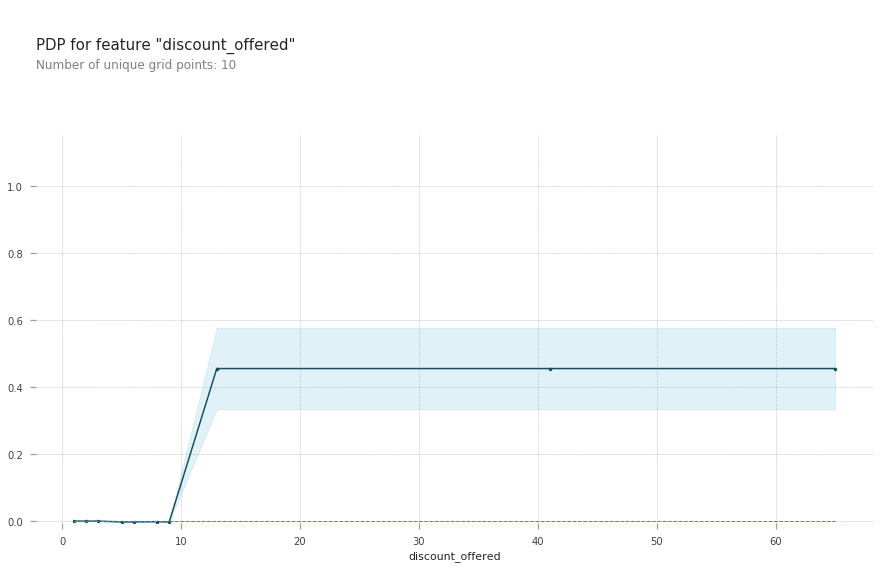

In [293]:
target_feature = "discount_offered"

isolated = pdp_isolate(
    model=xgb_3,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile", 
    num_grid_points=10, 
)
pdp_plot(isolated, feature_name=target_feature);

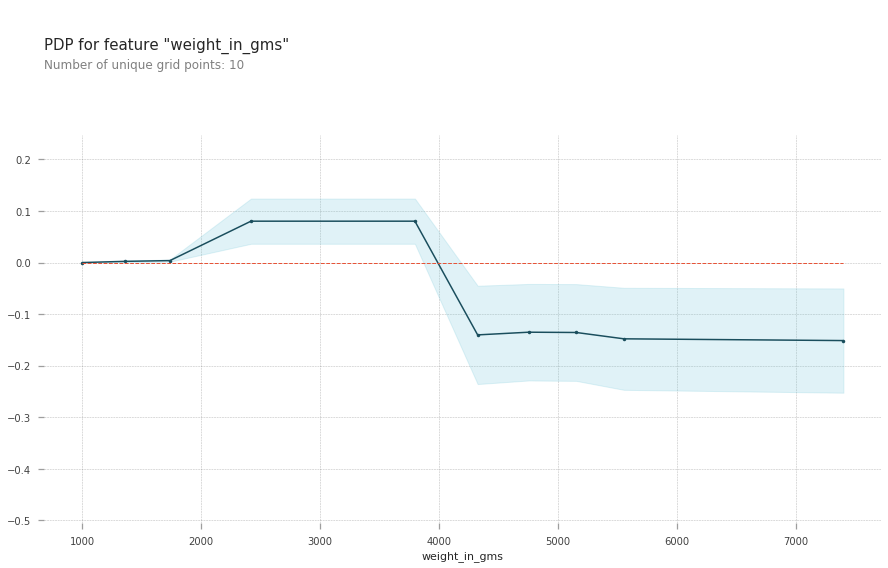

In [294]:
target_feature_1 = "weight_in_gms"

isolated_1 = pdp_isolate(
    model=xgb_3,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature_1,
    grid_type="percentile", 
    num_grid_points=10, 
)
pdp_plot(isolated_1, feature_name=target_feature_1);

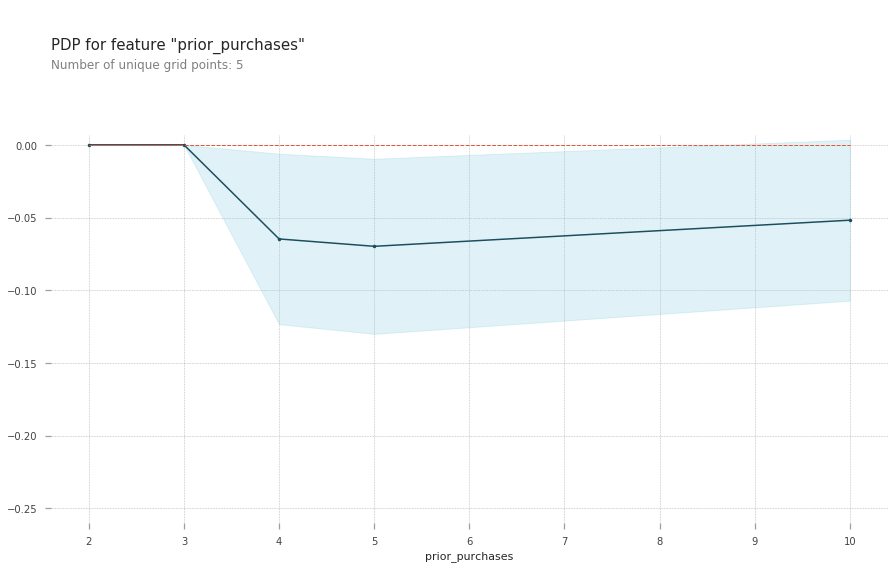

In [295]:
target_feature_2 = "prior_purchases"

isolated_2 = pdp_isolate(
    model=xgb_3,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature_2,
    grid_type="percentile", 
    num_grid_points=10, 
)
pdp_plot(isolated_2, feature_name=target_feature_2);

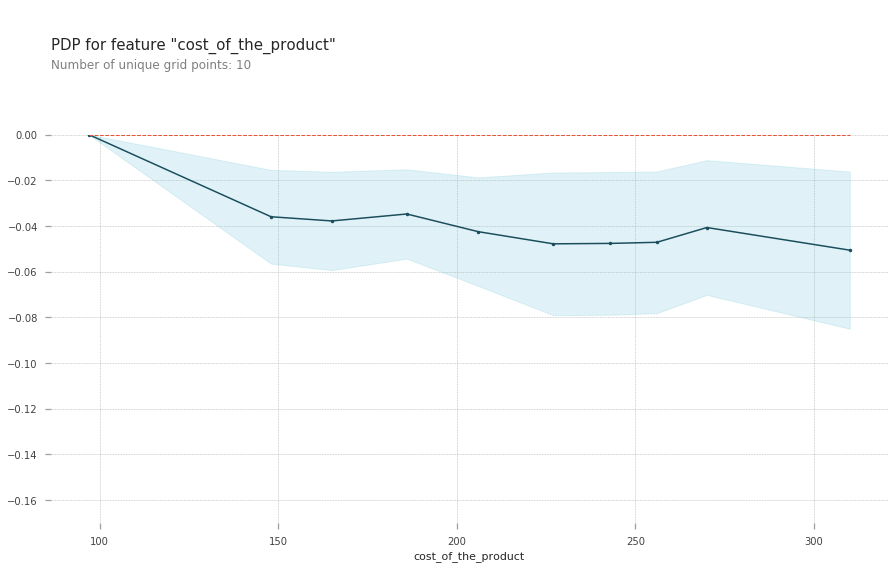

In [296]:
target_feature_3 = "cost_of_the_product"

isolated_3 = pdp_isolate(
    model=xgb_3,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature_3,
    grid_type="percentile", 
    num_grid_points=10, 
)
pdp_plot(isolated_3, feature_name=target_feature_3);

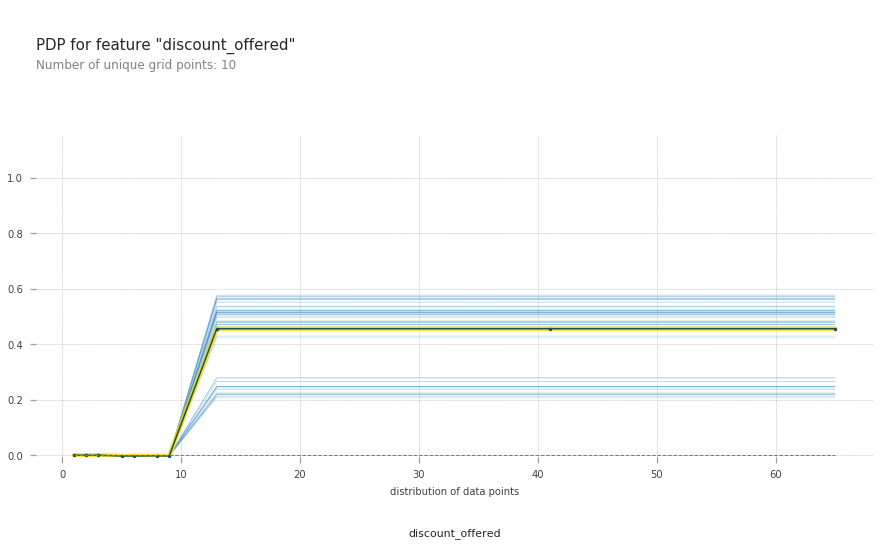

In [298]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
);

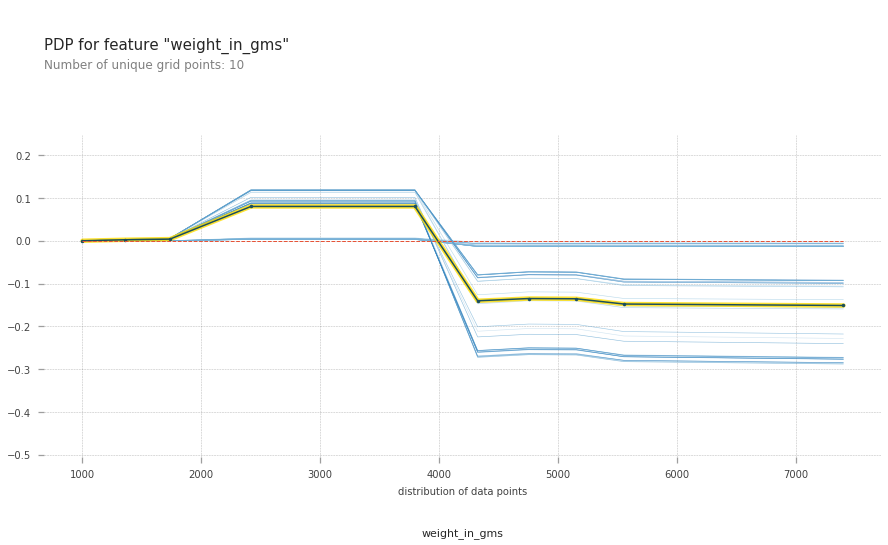

In [299]:
pdp_plot(
    isolated_1,
    feature_name=target_feature_1,
    plot_lines=True,  
    frac_to_plot=50,  
    plot_pts_dist=True,
);

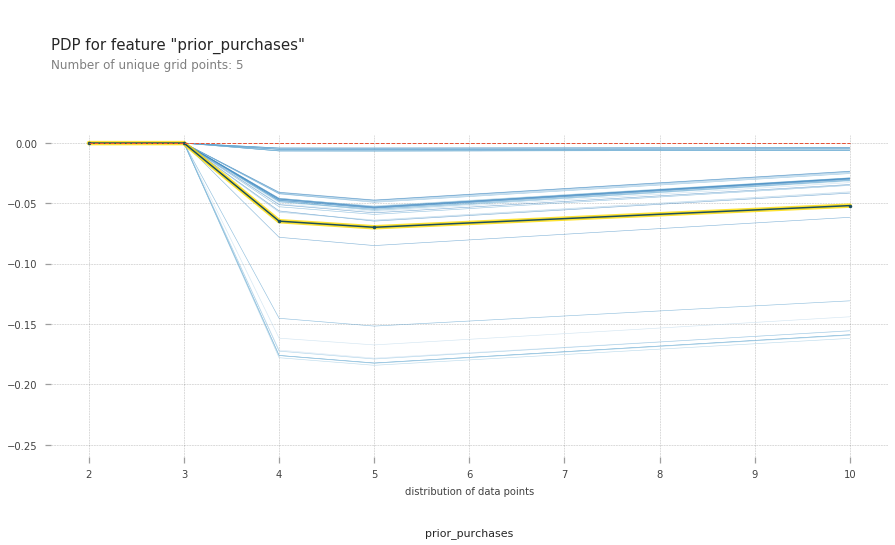

In [300]:
pdp_plot(
    isolated_2,
    feature_name=target_feature_2,
    plot_lines=True, 
    frac_to_plot=50,  
    plot_pts_dist=True,
);

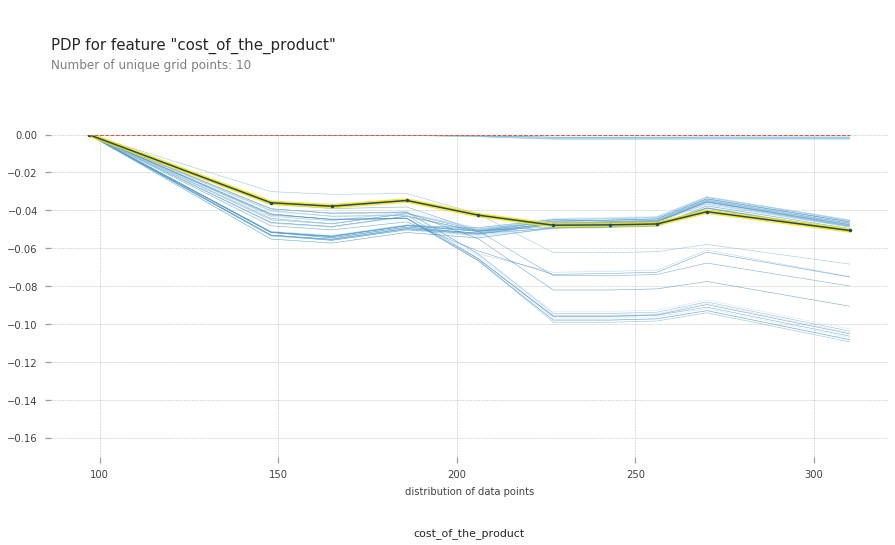

In [301]:
pdp_plot(
    isolated_3,
    feature_name=target_feature_3,
    plot_lines=True,  
    frac_to_plot=50,  
    plot_pts_dist=True,
);

In [267]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

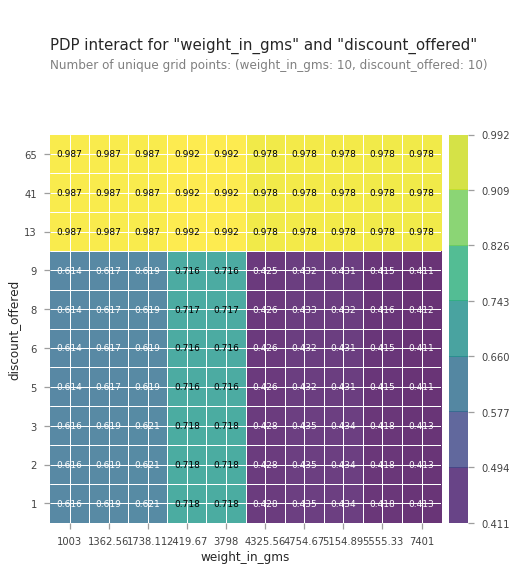

In [315]:
target_features = ["weight_in_gms", "discount_offered"]

interaction = pdp_interact(
    model=xgb_3,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

axes = pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

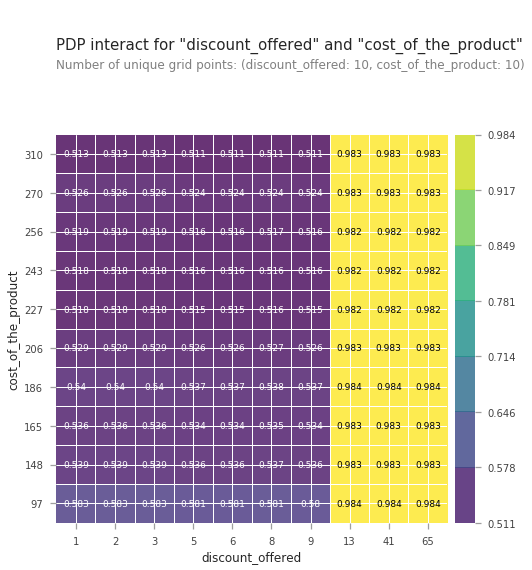

In [275]:
target_features = ["discount_offered", "cost_of_the_product"]

interaction = pdp_interact(
    model=xgb_3,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

axes = pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

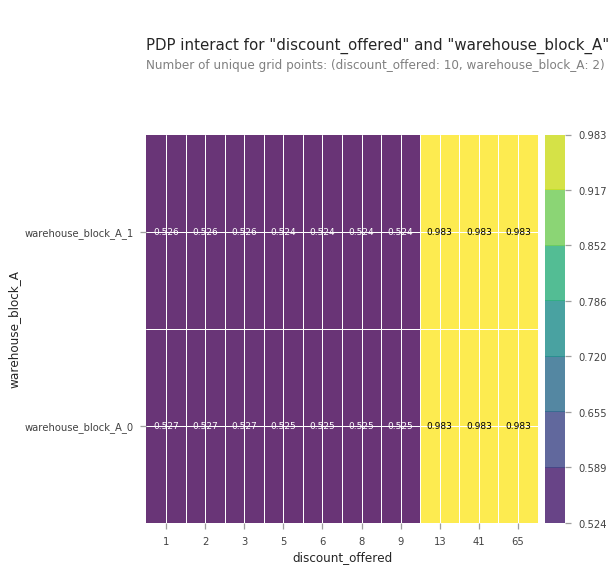

In [310]:
target_features = ["discount_offered", "warehouse_block_A"]

interaction = pdp_interact(
    model=xgb_3,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

axes = pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

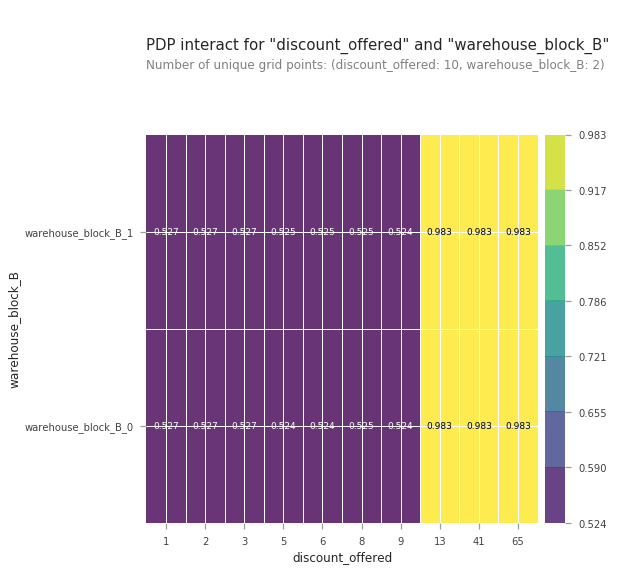

In [311]:
target_features = ["discount_offered", "warehouse_block_B"]

interaction = pdp_interact(
    model=xgb_3,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

axes = pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

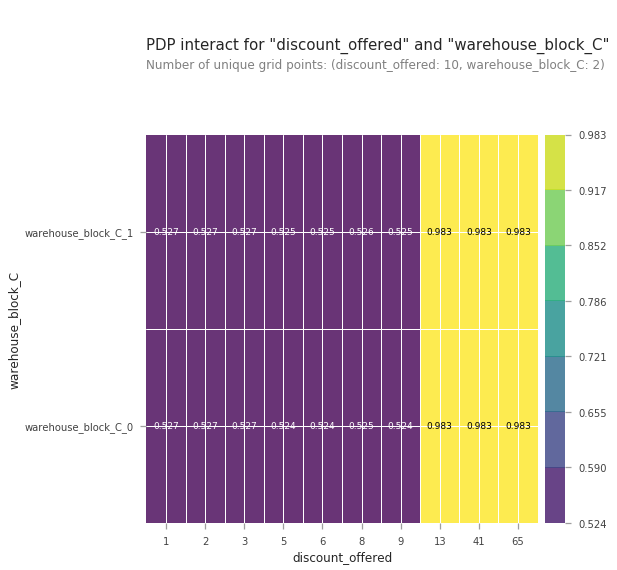

In [312]:
target_features = ["discount_offered", "warehouse_block_C"]

interaction = pdp_interact(
    model=xgb_3,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

axes = pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

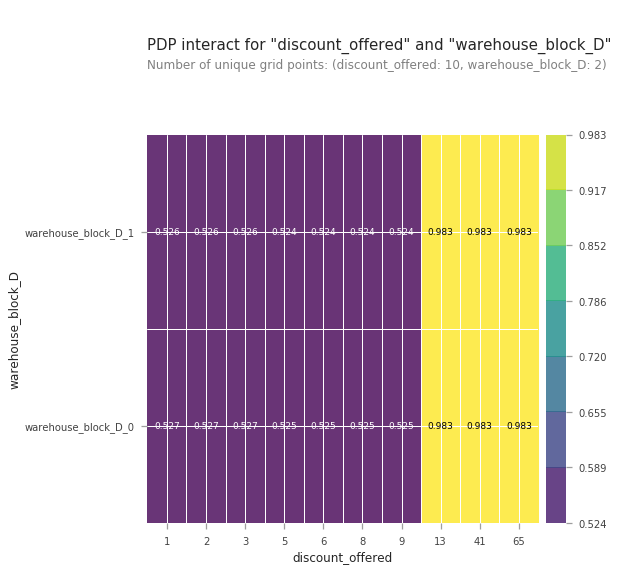

In [313]:
target_features = ["discount_offered", "warehouse_block_D"]

interaction = pdp_interact(
    model=xgb_3,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

axes = pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

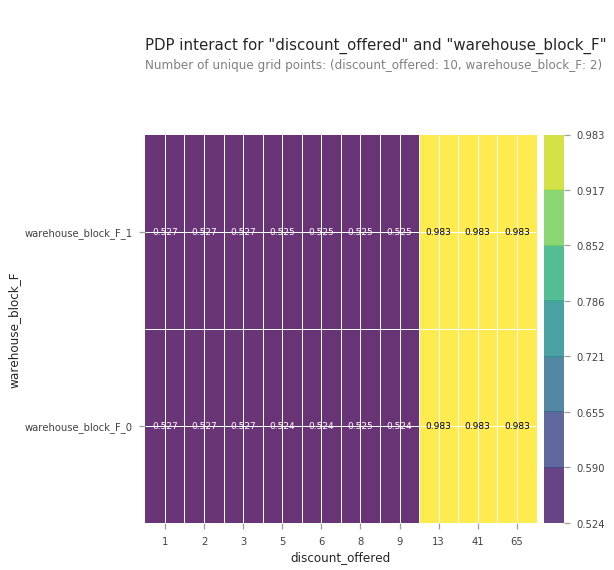

In [314]:
target_features = ["discount_offered", "warehouse_block_F"]

interaction = pdp_interact(
    model=xgb_3,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

axes = pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)